In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


In [4]:
# Load dataset
file_path = 'D:\jupyter\Linear regression Assignment/day.csv'  
bike_data = pd.read_csv(file_path)

# Convert 'season' and 'weathersit' to categorical values
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
bike_data['season'] = bike_data['season'].map(season_mapping)
bike_data['weathersit'] = bike_data['weathersit'].map(weathersit_mapping)

# Drop irrelevant columns
bike_data = bike_data.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# One-hot encoding for categorical variables
bike_data_encoded = pd.get_dummies(bike_data, drop_first=True)

# Separate features and target
X = bike_data_encoded.drop('cnt', axis=1)
y = bike_data_encoded['cnt']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Build the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate with R-squared score
y_pred = lr_model.predict(X_test_scaled)
r2_test_score = r2_score(y_test, y_pred)
r2_test_score  # This will show the R-squared score on the test set


0.8520828533826301

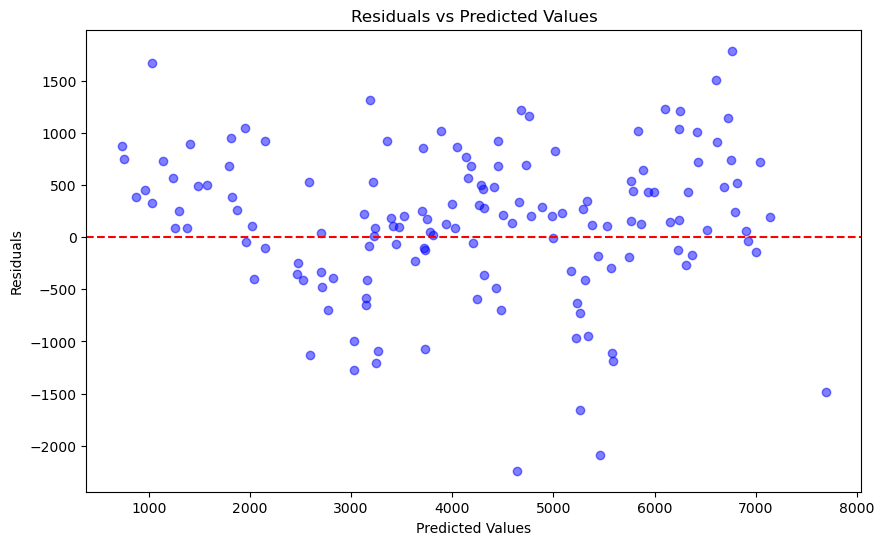

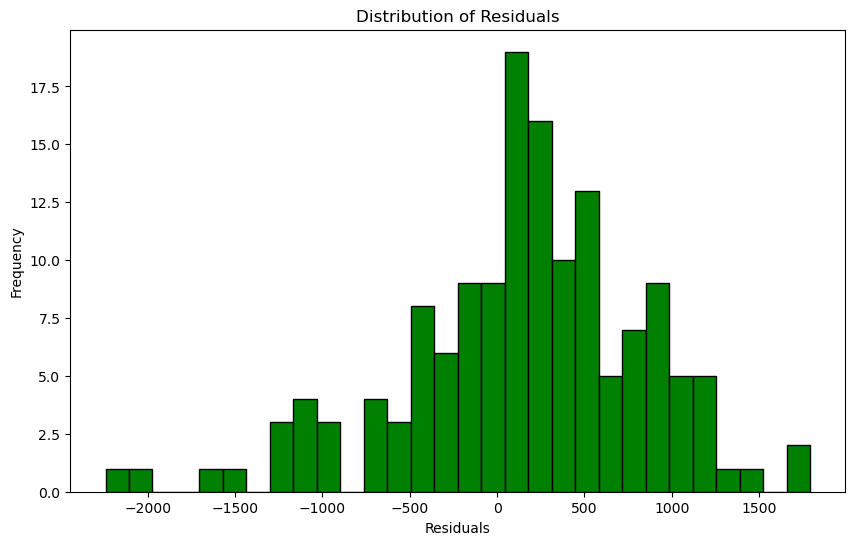

In [8]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Check the distribution of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='green', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Adding a constant for VIF calculation
X_train_scaled_with_const = np.column_stack([np.ones(X_train_scaled.shape[0]), X_train_scaled])

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled_with_const, i+1) for i in range(X_train.shape[1])]
vif.sort_values(by="VIF", ascending=False)


,Features,VIF
5,temp,185.801228
6,atemp,181.747725
9,season_spring,5.871838
1,mnth,3.777677
11,season_winter,3.676822
10,season_summer,2.576573
7,hum,1.915499
13,weathersit_Mist,1.601377
12,weathersit_Light Snow/Rain,1.350145
8,windspeed,1.262575


In [12]:
# Dropping 'atemp' due to high VIF
X_train_reduced = X_train.drop('atemp', axis=1)
X_test_reduced = X_test.drop('atemp', axis=1)

# Scaling the reduced features
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

# Retrain the model
lr_model_reduced = LinearRegression()
lr_model_reduced.fit(X_train_reduced_scaled, y_train)

# Make new predictions and evaluate the model
y_pred_reduced = lr_model_reduced.predict(X_test_reduced_scaled)
r2_test_score_reduced = r2_score(y_test, y_pred_reduced)
r2_test_score_reduced  # This will show the new R-squared score after removing multicollinearity


0.8513992677233245

In [14]:
# Examine the coefficients of the final model
coefficients = pd.DataFrame(lr_model_reduced.coef_, X_train_reduced.columns, columns=['Coefficient'])
coefficients


,Coefficient
yr,993.952491
mnth,-97.538781
holiday,-88.214188
weekday,136.473052
workingday,63.307091
temp,935.110171
hum,-148.390109
windspeed,-214.348893
season_spring,-408.482176
season_summer,110.327458
